<a href="https://colab.research.google.com/github/MandavaNagasreeKalpana/Generative_Ai_analytics_vidya/blob/main/Ml_healthcare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

In [7]:
data=pd.read_csv("/content/drive/MyDrive/Healthcare_Data_Preprocessed_FIXED.csv")
data.head()

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,37.0,26.0,111.0,198.0,99.0,72.0,5.5,1.7,1.6,4.4,...,1,2,1,0.0,1.0,False,True,True,False,False
1,37.0,24.0,121.0,199.0,103.0,75.0,4.5,1.9,2.6,5.6,...,1,2,1,2.0,2.0,False,False,True,False,False
2,81.0,27.0,NaN,NaN,100.0,74.0,12.1,2.9,2.6,1.8,...,2,0,0,1.0,0.0,True,False,False,False,False
3,25.0,21.0,150.0,199.0,102.0,70.0,4.3,1.0,1.7,5.2,...,1,2,1,2.0,0.0,True,False,False,True,False
4,24.0,26.0,146.0,202.0,99.0,76.0,16.0,5.0,3.4,1.4,...,2,0,2,0.0,2.0,False,True,False,True,False


In [8]:
#To remove null values
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns

for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])
data.isnull().sum()


,0
Age,0
BMI,0
Blood_Pressure,0
Cholesterol,0
Glucose_Level,0
Heart_Rate,0
Sleep_Hours,0
Exercise_Hours,0
Water_Intake,0
Stress_Level,0


In [9]:
#to convert categorical cols into numerical
data['Diet_Type_Vegan']=data['Diet_Type_Vegan'].astype(int)
data['Diet_Type_Vegetarian']=data['Diet_Type_Vegetarian'].astype(int)
data['Blood_Group_AB']=data['Blood_Group_AB'].astype(int)
data['Blood_Group_B']=data['Blood_Group_B'].astype(int)
data['Blood_Group_O']=data['Blood_Group_O'].astype(int)
data

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,37.0,26.0,111.000000,198.000000,99.0,72.0,5.5,1.7,1.6,4.4,...,1,2,1,0.0,1.0,0,1,1,0,0
1,37.0,24.0,121.000000,199.000000,103.0,75.0,4.5,1.9,2.6,5.6,...,1,2,1,2.0,2.0,0,0,1,0,0
2,81.0,27.0,130.922395,199.193934,100.0,74.0,12.1,2.9,2.6,1.8,...,2,0,0,1.0,0.0,1,0,0,0,0
3,25.0,21.0,150.000000,199.000000,102.0,70.0,4.3,1.0,1.7,5.2,...,1,2,1,2.0,0.0,1,0,0,1,0
4,24.0,26.0,146.000000,202.000000,99.0,76.0,16.0,5.0,3.4,1.4,...,2,0,2,0.0,2.0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5.0,22.0,109.000000,203.000000,98.0,75.0,6.2,2.2,2.5,4.1,...,0,2,2,1.0,0.0,1,0,1,0,0
9996,94.0,26.0,144.000000,203.000000,96.0,72.0,13.4,3.7,3.0,1.5,...,1,0,1,0.0,2.0,0,1,0,1,0
9997,37.0,23.0,185.000000,198.000000,103.0,72.0,5.3,1.8,2.9,7.0,...,1,0,2,0.0,1.0,1,0,1,0,0
9998,50.0,29.0,166.000000,200.000000,100.0,74.0,8.0,2.4,2.6,3.6,...,2,0,0,1.0,1.0,1,0,1,0,0


In [10]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr(method='pearson')
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type_Vegan,Diet_Type_Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
Age,1.000000,0.230988,0.127519,0.490660,-0.322907,-0.178157,0.330282,0.313706,0.260238,-0.272669,...,-0.001215,0.005166,-0.004890,-0.005712,0.003184,0.001676,-0.005705,-0.017099,-0.015539,0.023643
BMI,0.230988,1.000000,-0.163454,0.157198,-0.175902,0.136993,0.197739,0.190155,0.160428,-0.166597,...,0.008309,-0.006405,0.000808,-0.006426,-0.016302,0.001647,-0.007147,-0.005402,-0.005369,0.017869
Blood_Pressure,0.127519,-0.163454,1.000000,0.218728,0.184347,0.015953,0.024213,0.021622,0.020884,-0.014385,...,-0.014119,0.011475,-0.012690,0.002225,0.005389,-0.023967,0.010375,0.009394,0.006322,-0.007123
Cholesterol,0.490660,0.157198,0.218728,1.000000,-0.250062,0.005877,0.342738,0.331484,0.272579,-0.283534,...,0.005221,-0.006885,-0.003800,0.000580,-0.005885,-0.011974,0.011403,0.001576,-0.011506,0.003649
Glucose_Level,-0.322907,-0.175902,0.184347,-0.250062,1.000000,0.250626,-0.210760,-0.194704,-0.165224,0.171221,...,0.000320,-0.006939,0.016544,-0.014440,-0.003813,-0.000070,-0.000003,0.006426,0.024205,-0.015412
Heart_Rate,-0.178157,0.136993,0.015953,0.005877,0.250626,1.000000,-0.158201,-0.151422,-0.133104,0.123141,...,0.011283,0.001869,0.006001,0.001374,-0.010734,-0.013602,-0.008657,-0.003631,0.027364,-0.028745
Sleep_Hours,0.330282,0.197739,0.024213,0.342738,-0.210760,-0.158201,1.000000,0.944183,0.786439,-0.834164,...,0.012633,-0.007421,-0.011703,-0.010319,0.011047,0.010179,0.012393,-0.006754,-0.006752,0.008170
Exercise_Hours,0.313706,0.190155,0.021622,0.331484,-0.194704,-0.151422,0.944183,1.000000,0.831317,-0.802811,...,0.011307,-0.010816,-0.009483,-0.009000,0.012732,0.009318,0.010892,-0.002718,-0.006516,0.004161
Water_Intake,0.260238,0.160428,0.020884,0.272579,-0.165224,-0.133104,0.786439,0.831317,1.000000,-0.667998,...,0.002152,-0.014278,-0.009766,-0.003561,0.020187,0.014124,0.005353,-0.004858,0.002912,-0.010497
Stress_Level,-0.272669,-0.166597,-0.014385,-0.283534,0.171221,0.123141,-0.834164,-0.802811,-0.667998,1.000000,...,-0.021568,0.010821,0.012083,0.002952,-0.017531,-0.003868,-0.020624,0.005372,0.005278,-0.011252


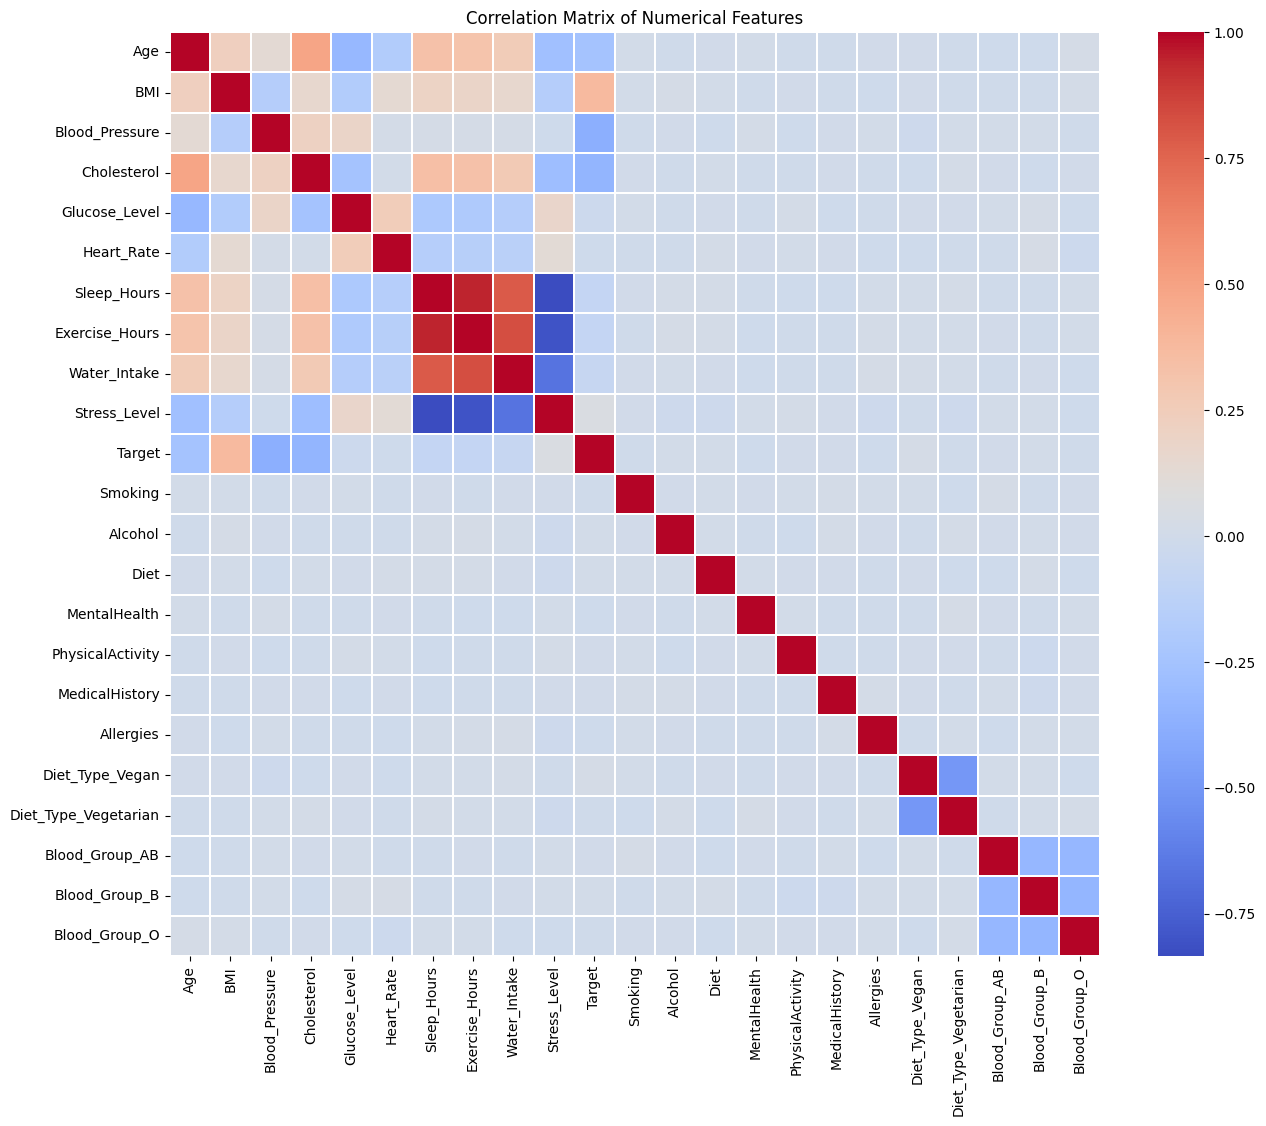

Correlation matrix heatmap displayed successfully.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Correlation matrix heatmap displayed successfully.")

In [12]:
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(f"Highly correlated features to remove: {highly_correlated_features}")

data_filtered = data.drop(columns=list(highly_correlated_features))
print(f"Original DataFrame shape: {data.shape}")
print(f"DataFrame shape after removing highly correlated features: {data_filtered.shape}")

Highly correlated features to remove: {'Exercise_Hours'}
Original DataFrame shape: (10000, 23)
DataFrame shape after removing highly correlated features: (10000, 22)


In [13]:
import statsmodels.api as sm

numerical_data_vif = data_filtered.select_dtypes(include=['number'])
X = sm.add_constant(numerical_data_vif)

print("Numerical data for VIF calculation (with constant term) prepared successfully.")
print(X.head())

Numerical data for VIF calculation (with constant term) prepared successfully.
   const   Age   BMI  Blood_Pressure  Cholesterol  Glucose_Level  Heart_Rate  \
0    1.0  37.0  26.0      111.000000   198.000000           99.0        72.0   
1    1.0  37.0  24.0      121.000000   199.000000          103.0        75.0   
2    1.0  81.0  27.0      130.922395   199.193934          100.0        74.0   
3    1.0  25.0  21.0      150.000000   199.000000          102.0        70.0   
4    1.0  24.0  26.0      146.000000   202.000000           99.0        76.0   

   Sleep_Hours  Water_Intake  Stress_Level  ...  Diet  MentalHealth  \
0          5.5           1.6           4.4  ...     1             2   
1          4.5           2.6           5.6  ...     1             2   
2         12.1           2.6           1.8  ...     2             0   
3          4.3           1.7           5.2  ...     1             2   
4         16.0           3.4           1.4  ...     2             0   

   PhysicalAc

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data.set_index('feature').sort_values(by='VIF', ascending=False))


Variance Inflation Factor (VIF) for each feature:
                               VIF
feature                           
const                 19645.641165
Sleep_Hours               5.016707
Stress_Level              3.298061
Water_Intake              2.630936
Target                    1.643015
Cholesterol               1.616726
Age                       1.603574
Blood_Group_O             1.512952
Blood_Group_B             1.512794
BMI                       1.508441
Blood_Group_AB            1.503314
Diet_Type_Vegetarian      1.336812
Diet_Type_Vegan           1.335981
Glucose_Level             1.299251
Blood_Pressure            1.251754
Heart_Rate                1.195985
PhysicalActivity          1.002527
MedicalHistory            1.002325
Diet                      1.002217
Alcohol                   1.002140
Allergies                 1.002120
Smoking                   1.001888
MentalHealth              1.001788


In [15]:
removed_features = []

while True:
    # Recalculate VIFs inside the loop for the current set of features
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Sort VIFs to easily find the highest (excluding the 'const' term)
    vif_data_sorted = vif_data.drop(index=vif_data[vif_data['feature'] == 'const'].index).sort_values(by="VIF", ascending=False)

    # Check if there are any features left to evaluate after 'const'
    if vif_data_sorted.empty:
        break # No features left other than 'const'

    highest_vif_feature = vif_data_sorted.iloc[0]

    if highest_vif_feature['VIF'] > 10:
        feature_to_remove = highest_vif_feature['feature']
        X = X.drop(columns=[feature_to_remove])
        removed_features.append(feature_to_remove)
        print(f"Removed feature: {feature_to_remove} (VIF: {highest_vif_feature['VIF']:.2f})")
    else:
        break # All remaining features have VIF <= 10

print("\nFinal Variance Inflation Factor (VIF) for each feature:")
print(vif_data.set_index('feature').sort_values(by='VIF', ascending=False))

print(f"\nFeatures removed due to high VIF: {removed_features}")
print(f"Shape of X after removing high VIF features: {X.shape}")


Final Variance Inflation Factor (VIF) for each feature:
                               VIF
feature                           
const                 19645.641165
Sleep_Hours               5.016707
Stress_Level              3.298061
Water_Intake              2.630936
Target                    1.643015
Cholesterol               1.616726
Age                       1.603574
Blood_Group_O             1.512952
Blood_Group_B             1.512794
BMI                       1.508441
Blood_Group_AB            1.503314
Diet_Type_Vegetarian      1.336812
Diet_Type_Vegan           1.335981
Glucose_Level             1.299251
Blood_Pressure            1.251754
Heart_Rate                1.195985
PhysicalActivity          1.002527
MedicalHistory            1.002325
Diet                      1.002217
Alcohol                   1.002140
Allergies                 1.002120
Smoking                   1.001888
MentalHealth              1.001788

Features removed due to high VIF: []
Shape of X after removing high

In [16]:
X = X.drop(columns=['const', 'Target'])
y = numerical_data_vif['Target']

print("Features (X) and target (y) separated successfully.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print("First 5 rows of X:")
print(X.head())
print("First 5 rows of y:")
print(y.head())

Features (X) and target (y) separated successfully.
Shape of X: (10000, 21)
Shape of y: (10000,)
First 5 rows of X:
    Age   BMI  Blood_Pressure  Cholesterol  Glucose_Level  Heart_Rate  \
0  37.0  26.0      111.000000   198.000000           99.0        72.0   
1  37.0  24.0      121.000000   199.000000          103.0        75.0   
2  81.0  27.0      130.922395   199.193934          100.0        74.0   
3  25.0  21.0      150.000000   199.000000          102.0        70.0   
4  24.0  26.0      146.000000   202.000000           99.0        76.0   

   Sleep_Hours  Water_Intake  Stress_Level  Smoking  ...  Diet  MentalHealth  \
0          5.5           1.6           4.4        2  ...     1             2   
1          4.5           2.6           5.6        0  ...     1             2   
2         12.1           2.6           1.8        2  ...     2             0   
3          4.3           1.7           5.2        2  ...     1             2   
4         16.0           3.4           1.4   

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets successfully.
Shape of X_train: (8000, 21)
Shape of X_test: (2000, 21)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier with n_neighbors = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the training data
knn_model.fit(X_train, y_train)

print("KNN model initialized and trained successfully.")
print(f"Trained KNN model: {knn_model}")

KNN model initialized and trained successfully.
Trained KNN model: KNeighborsClassifier()


In [19]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n")
print(report)

Model Accuracy: 0.8240

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1007
           1       0.82      0.82      0.82       993

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000



In [20]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully using StandardScaler.")
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Features scaled successfully using StandardScaler.
Shape of X_train_scaled: (8000, 21)
Shape of X_test_scaled: (2000, 21)


In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Instantiate KNeighborsClassifier
knn_base = KNeighborsClassifier()

# Instantiate GridSearchCV with the KNN classifier and parameter grid
grid_search = GridSearchCV(knn_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

print("Hyperparameter tuning using GridSearchCV completed successfully.")
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Hyperparameter tuning using GridSearchCV completed successfully.
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation accuracy: 0.7876


In [22]:
from sklearn.metrics import accuracy_score, classification_report

# Get the best KNN model from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Make predictions on the scaled test set using the best model
y_pred_scaled = best_knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Tuned KNN Model Accuracy (with scaling): {accuracy_scaled:.4f}")

# Generate classification report
report_scaled = classification_report(y_test, y_pred_scaled)
print("\nTuned KNN Model Classification Report (with scaling):\n")
print(report_scaled)

# Compare with the previously trained KNN model (without scaling and tuning)
print("\n--- Comparison with Initial KNN Model ---")
print(f"Initial KNN Model Accuracy (without scaling): {accuracy:.4f}")
print("\nInitial KNN Model Classification Report:\n")
print(report)

Tuned KNN Model Accuracy (with scaling): 0.7860

Tuned KNN Model Classification Report (with scaling):

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1007
           1       0.80      0.77      0.78       993

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000


--- Comparison with Initial KNN Model ---
Initial KNN Model Accuracy (without scaling): 0.8240

Initial KNN Model Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1007
           1       0.82      0.82      0.82       993

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

